In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.optimize as soc 
from scipy import stats
from sigfig import round
from scipy import constants as const
from scipy.odr import *


def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [2]:
#Konstanten definieren
L = 0.07 # in m 
l = 0.455 # in m 
a = 0.0025 # in m

eps = 0.966   #epsilon Wert
ueps = 0.023  #epsilon Unsicherheit 

In [3]:
#Daten der B-Felder importieren
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

In [4]:
#Definieren der notierten Daten

#Temperatur [K]
T = np.array([458.15, 458.65,458.65,458.65,458.65,458.65,458.65,458.65,458.65,459.15])
uTS = np.array([0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0])   #Schwankung der T 
uT1 = 1/(2*np.sqrt(3))                                  #Ableseungenauigkeit

#Spulenstrom [A]
I = [0.33,0.395,0.46,0.51,0.58,0.66,0.73,0.81,0.87,0.96]
uA = 0.01/(2*np.sqrt(3))                                #Ableseungenauigkeit
uIS = [0,0.5,0,0,0,0,0,0,0,0]         #Schwankung von I 

#Positionen der Spindel [Schritte]
xcalib = [(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]


In [46]:
#Unsicherheit des Ofens berechnen 
a = 1
u_Ofen = np.sqrt(((a)/(2 * np.sqrt(3)))**2+(1)**2)

#Umrechnung in mu m
u_OfG = u_Ofen*10.5

/Users/ludwigschulz/Desktop/conda/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/ludwigschulz/Desktop/conda/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/ludwigschulz/Desktop/conda/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/ludwigschulz/Desktop/conda/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/ludwigschulz/Desktop/

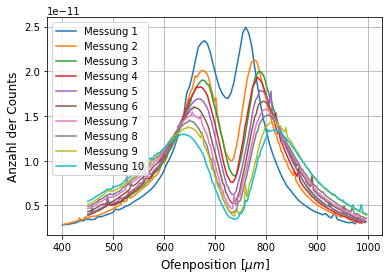

In [35]:
#Lineares Modell
def linear(m:float,b:float,x:np.ndarray):
    return m*x+b

#Offset berechen
bc = []

for  i in range(len(xcalib)):
    popt,_ = soc.curve_fit(linear,xcalib[i],ycalib[i])
    
    #Fit anwenden und umrechnen in mu m
    bc.append((popt[1]*bfields[i][:,0]+popt[0])*10.5)
    
    #plt.plot(bfields[i][:,0],bfields[i][:,1], label="Daten vor Korrektur")
    #plt.plot(popt[1]*bfields[i][:,0]+popt[0],bfields[i][:,1],label="Daten nach der Korrektur")
    plt.plot((popt[1]*bfields[i][:,0]+popt[0]),bfields[i][:,1],label="Messung "+str(i+1))
    
    plt.xlabel(r"Ofenposition [$\mu m$]",fontsize = 12)
    plt.ylabel(r"Anzahl der Counts", fontsize = 12)
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("Plots/AlleMessungen.pdf")
    #plt.savefig("Plots/Korrektur-x-Achse.pdf")

In [36]:
#Gauß-Funktion mit zwei Spitzenwerten definieren
def doublegaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,
    b: float, mu2: float, sigma2: float,
    y0: float): 
    return (
        y0
        + a * np.exp(-(np.abs(x-mu1)/(np.sqrt(2)*sigma1))**2)
        + b * np.exp(-(np.abs(x-mu2)/(np.sqrt(2)*sigma2))**2)
    )

In [37]:
#Funktion um die Daten mit einer Doppel-Gauß-Funktion zu fitten
def fitdoublegaussian(x:np.ndarray,y:np.ndarray,p0:float,ue:np.ndarray,uue:np.ndarray):
    x,y = x,y
    popt1,pcov1 = soc.curve_fit(doublegaussian,x,y,p0=p0)
    
    #Abstand zum Mittelwert
    mean = np.abs((popt1[1] + popt1[4])/2)
    
    #distanz eines Peaks zum Mittelpunkt
    dprint = np.abs(mean-popt1[1])
    ue.append(dprint)
    
    #Messfehler der Peaks
    up1 = np.sqrt((popt1[2])**2+u_OfG**2)
    up2 = np.sqrt((popt1[5])**2+u_OfG**2)
    
    #Messfehler Mittelwert
    ud = np.sqrt((0.5*up1 )**2 + (0.5*up2)**2)
    uue.append(ud)

    print("1&",np.round(popt1[1], 2), "$\pm$", np.round(up1,2), " & ", np.round(popt1[4],2), "$\pm$", np.round(up1, 2), " & ", np.round(dprint,2), "$\pm$", np.round(ud,2), "\\"+"\\","\hline")
        
    #print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[2]),";","Peak2: "+str(popt1[4]),"+/-","Abweichung: "+str(popt1[5]))
    # plt.scatter(x,y,label="data",s=2)
    # plt.plot(x,doublegaussian(x,*popt1),label="fit"+str(i))
    # plt.legend(loc=0)
    # plt.xlabel(r"$u_e$")
    # plt.grid(True, which = "major")
    # plt.show()
    #plt.savefig("doublegauß.png")

In [38]:
#Daten an Gauß-Funktion fitten und ue und Unsicherheit exportieren
d,ud = [],[] 

fitdoublegaussian(bc[0],bf1[:,1], (2.35*1e-11, 680*10.5, 20*10.5, 2.5*1e-11, 775*10.5, 20*10.5, 3e-12),d,ud)
fitdoublegaussian(bc[1],bf3[:,1], (2*1e-11, 712*10.5, 20*10.5, 2.1 *1e-11, 800*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[2],bf4[:,1], (2*1e-11, 690*10.5, 20*10.5, 2.1 *1e-11, 790*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[3],bf5[:,1], (1.8*1e-11, 675*10.5, 30*10.5, 1.9 *1e-11, 782*10.5,20*10.5, 21e-11),d,ud)
fitdoublegaussian(bc[4],bf6[:,1], (2*1e-11, 660*10.5, 40*10.5, 2.1 *1e-11, 770*10.5, 20*10.5, 0.6*1e-11),d,ud)
fitdoublegaussian(bc[5],bf7[:,1], (2*1e-11, 655*10.5, 20*10.5, 2.1 *1e-11, 790*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[6],bf8[:,1], (2*1e-11, 650*10.5, 20*10.5, 2.1 *1e-11, 795*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[7],bf9[:,1], (1.4 *1e-11, 650*10.5, 20*10.5, 2.1 *1e-11, 810*10.5, 40*10.5, 0.4 * 1e-11),d,ud)
fitdoublegaussian(bc[8],bf10[:,1], (2*1e-11, 645*10.5, 20*10.5, 2.1 *1e-11, 820*10.5, 40*10.5, 1e-11),d,ud)
fitdoublegaussian(bc[9],bf11[:,1], (1.2*1e-11, 630*10.5, 20*10.5, 1.25 *1e-11, 825*10.5, 40*10.5, 0.35*1e-11),d,ud)


ue = np.array(d)
uue = np.array(ud)
print(ue)

1& 7061.67 $\pm$ 435.06  &  8062.27 $\pm$ 435.06  &  500.3 $\pm$ 269.16 \\ \hline
1& 6977.42 $\pm$ 452.65  &  8254.34 $\pm$ 452.65  &  638.46 $\pm$ 281.89 \\ \hline
1& 6977.04 $\pm$ 450.46  &  8374.63 $\pm$ 450.46  &  698.8 $\pm$ 281.46 \\ \hline
1& 6909.41 $\pm$ 455.17  &  8337.87 $\pm$ 455.17  &  714.23 $\pm$ 283.52 \\ \hline
1& 6860.25 $\pm$ 469.54  &  8415.89 $\pm$ 469.54  &  777.82 $\pm$ 290.5 \\ \hline
1& 6783.51 $\pm$ 475.21  &  8468.66 $\pm$ 475.21  &  842.58 $\pm$ 297.54 \\ \hline
1& 6711.59 $\pm$ 491.36  &  8510.14 $\pm$ 491.36  &  899.27 $\pm$ 305.5 \\ \hline
1& 6634.03 $\pm$ 510.45  &  8554.24 $\pm$ 510.45  &  960.11 $\pm$ 315.31 \\ \hline
1& 6598.44 $\pm$ 519.45  &  8676.46 $\pm$ 519.45  &  1039.01 $\pm$ 322.58 \\ \hline
1& 6477.49 $\pm$ 554.67  &  8719.44 $\pm$ 554.67  &  1120.97 $\pm$ 339.99 \\ \hline
[ 500.29859734  638.46176963  698.79725181  714.22960776  777.81619806
  842.57689897  899.27195696  960.10603134 1039.00772986 1120.97214527]


In [39]:
#Unsicherheit der Temperatur berechnen
uT = np.array([])
for i in np.arange(0, len(uTS)):
    uT = np.append(uT,np.sqrt((uT1)**2 + (uTS[i])**2))
print(uT)

[0.28867513 0.57735027 0.57735027 0.57735027 0.57735027 0.57735027
 0.57735027 0.57735027 0.57735027 0.28867513]


In [40]:
#Unsicherheit von Stromstärke berechnen
uI = np.array([])
for i in np.arange(0,len(I)):
    uI = np.append(uI,np.sqrt((uA)**2 + (uIS[i])**2))
print(uI)

[0.00288675 0.50000833 0.00288675 0.00288675 0.00288675 0.00288675
 0.00288675 0.00288675 0.00288675 0.00288675]


In [41]:
#Approximieren des B-Feldes
B, uB = np.array([]),np.array([])
for i in np.arange(0,len(I)):
    B = np.append(B,(-0.00512 + 0.55713 * I[i]+0.26883 * I[i]**2 -0.24218 * I[i] **3))
    uB = np.append(uB,(np.sqrt((( 0.55713 + 2 * 0.26883 * I[i]- 3 * 0.24218 * I[i]**2) * uI[i])**2)))
print(uB)

[0.00189209 0.32807912 0.00187846 0.00185434 0.00180296 0.00171907
 0.00162365 0.00148942 0.00137114 0.00116539]


In [42]:
#Gradient des B-Feldes berechnen 
dB, udB = np.array([]),np.array([])
for i in np.arange(0,len(B)):
    dB = np.append(dB,(B[i] * eps)/(a))
    udB = np.append(udB,np.sqrt(((eps)/(a)*uB[i])**2 + ((B[i]/a) * ueps)**2))
print(dB)
print(udB)

[0.19252889 0.23373822 0.27479937 0.3060419  0.34891687 0.39612025
 0.43531077 0.47704005 0.50578241 0.54406392]
[0.00493497 0.31697328 0.00678981 0.00750366 0.00848815 0.00957651
 0.01048255 0.01144886 0.01211506 0.01300273]


In [43]:
#Printen der Werte als Latex Tabelle
# for i in range(len(B)):
#         print(i+1,'&', np.round(T[i],2), "$\pm$", round(uT[i], sigfigs = 2), "&", np.round(I[i],4), "$\pm$", round(uI[i],sigfigs =2), "&", np.round(B[i],4), "$\pm$",round(uB[i],sigfigs = 2), "&",
#           np.round(dB[i],2), "$\pm$",round(udB[i],sigfigs = 2), "\\\\", "\hline")

In [44]:
#x,y Werte für den magnetischen Moment Fit berechnen

x,y,ux,uy = np.array([]),np.array([]),np.array([]),np.array([])

for i in range(len(ue)):
    x = np.append(x,dB[i] * l * L * (1-L/(2*l)))
    y = np.append(y,ue[i] * 10**(-6) * 6 * const.k * T[i])
    ux = np.append(ux,np.sqrt(  udB[i] *l  * L * (1-L/(2*l))))
    uy = np.append(uy,np.sqrt(( 6 * const.Boltzmann * T[i] *uue[i]/2 * 10**(-6))**2+(ue[i] * 10**(-6) * 6 * const.Boltzmann * T[i] * uT[i] )**2))

print(x)

[0.00566035 0.0068719  0.0080791  0.00899763 0.01025816 0.01164594
 0.01279814 0.01402498 0.01487    0.01599548]


Beta: [2.16301505e-21 7.33178948e-24]
Beta Std Error: [9.00813317e-23 9.71424175e-25]
Beta Covariance: [[ 1.38887317e-41 -1.42129798e-43]
 [-1.42129798e-43  1.61514235e-45]]
Residual Variance: 0.0005842611496558603
Inverse Condition #: 0.00033988290442355055
Reason(s) for Halting:
  Sum of squares convergence


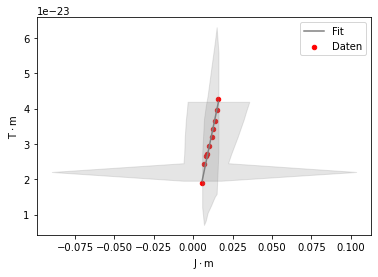

2.1630150455333114e-21

In [45]:
#Lineare Funktion
def lin_func(p, x):
    m, b = p
    return m*x + b

def calculate_chi_r_squared(observed, expected):
    print("Chi^2: ", np.sum((observed - expected) ** 2 / expected))
    print("R^2: ", 1 - np.sum((observed - expected) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

#Modell kreiren an das gefittet wird
lin_model = Model(lin_func)

#Objekt der Daten erstellen
data = RealData(x, y, sx=ux, sy=uy)

#ODR initialize
odr = ODR(data, lin_model, beta0=[0., 1.])

#ODR starten
out = odr.run()

#Built-In Methode um Fehler auszugeben
out.pprint()

x_fit = np.linspace(x[0], x[-1], 10)
y_fit = lin_func(out.beta, x_fit)

plt.plot(x_fit, y_fit,"-",c="gray",label="Fit")
plt.scatter(x, y, c="red",s=20,label = "Daten")
plt.xlabel(r"$\mathrm{J\cdot m}$")
plt.ylabel(r"$\mathrm{T\cdot m}$")
plt.fill_between(x_fit, y_fit - uy, y_fit + uy,
                 color='gray', alpha=0.2)
plt.fill_betweenx(y_fit,x_fit-ux,x_fit+ux,color="gray",alpha=0.2)
plt.legend(loc=0)
plt.show()
out.beta[0]

Beta: [5.70970745e-24 1.96666294e-21]
Beta Std Error: [1.41752196e-24 1.31459927e-22]
Beta Covariance: [[ 1.37926393e-45 -1.21353620e-43]
 [-1.21353620e-43  1.18624545e-41]]
Residual Variance: 0.0014568412000334529
Inverse Condition #: 0.03184651817411487
Reason(s) for Halting:
  Sum of squares convergence


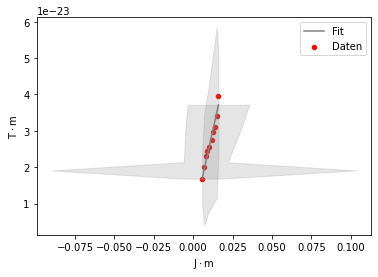

1.966662940036078e-21

In [64]:
#abgelesene Distanzen
d = [44,53,61,64,67,72,78,82,90,104]
d_new = np.array([])

for i in np.arange(0,len(d)):
    d_new = np.append(d_new, d[i]*10**(-5))

#x,y Werte für den magnetischen Moment Fit berechnen

x,y,ux,uy = np.array([]),np.array([]),np.array([]),np.array([])

for i in range(len(d_new)):
    x = np.append(x,dB[i] * l * L * (1-L/(2*l)))
    y = np.append(y,d_new[i]  * 6 * const.k * T[i])
    ux = np.append(ux,np.sqrt(  udB[i] *l  * L * (1-L/(2*l))))
    uy = np.append(uy,np.sqrt(( 6 * const.Boltzmann * T[i] *uue[i]/2 * 10**(-6))**2+(ue[i] * 10**(-6) * 6 * const.Boltzmann * T[i] * uT[i] )**2))

#Lineare Funktion
def lin_func(p, x):
    b,m = p
    return m*x + b

def calculate_chi_r_squared(observed, expected):
    print("Chi^2: ", np.sum((observed - expected) ** 2 / expected))
    print("R^2: ", 1 - np.sum((observed - expected) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

#Modell kreiren an das gefittet wird
lin_model = Model(lin_func)

#Objekt der Daten erstellen
data = RealData(x, y, sx=ux, sy=uy)

#ODR initialize
odr = ODR(data, lin_model, beta0=[0., 1.])

#ODR starten
out = odr.run()

#Built-In Methode um Fehler auszugeben
out.pprint()

x_fit = np.linspace(x[0], x[-1], 10)
y_fit = lin_func(out.beta, x_fit)

plt.plot(x_fit, y_fit,"-",c="gray",label="Fit")
plt.scatter(x, y, c="red",s=20,label = "Daten")
plt.xlabel(r"$\mathrm{J\cdot m}$")
plt.ylabel(r"$\mathrm{T\cdot m}$")
plt.fill_between(x_fit, y_fit - uy, y_fit + uy,
                 color='gray', alpha=0.2)
plt.fill_betweenx(y_fit,x_fit-ux,x_fit+ux,color="gray",alpha=0.2)
plt.legend(loc=0)
plt.show()
out.beta[1]


    